# Kaggle 2 (Lenguaje de signos)

## Definimos la ruta de los archivos y las variables estáticas 

In [1]:
IMAGE_WIDTH = 64
IMAGE_HEIGHT = 64
IMAGE_CHANNELS = 3
IMAGE_SIZE = (IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)

ROOT_PATH = '/home/gonzalo/Documentos/Data_Science/dataset_lengua_signos_kaggle_2/que-dices-colega2/movida/'

TR_PATH = 'train/'
TS_PATH = 'test/'

TRAIN_PATH = ROOT_PATH + TR_PATH
TEST_PATH = ROOT_PATH + TS_PATH

In [2]:
print(TRAIN_PATH)
print(TEST_PATH)

/home/gonzalo/Documentos/Data_Science/dataset_lengua_signos_kaggle_2/que-dices-colega2/movida/train/
/home/gonzalo/Documentos/Data_Science/dataset_lengua_signos_kaggle_2/que-dices-colega2/movida/test/


## Cargamos las imágenes de train y los labels

In [3]:
import os
import pandas as pd

filename_list = []

for files in os.listdir(TRAIN_PATH):
    filename = files.split('.')[0]
    filename = int(filename)
    filename_list.append(filename)
    
files_sorted = sorted(filename_list)

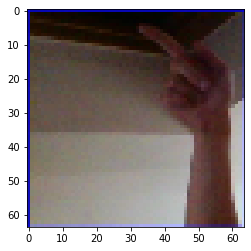

In [4]:
import matplotlib.pyplot as plt
from skimage.io import imread
import numpy as np
import cv2

x = []

for i in range(len(files_sorted)):
    filename = files_sorted[i]
    
    image = imread(TRAIN_PATH + str(filename) + '.jpg')
    smallimage = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))
    
    x.append(smallimage)
    
X_train = np.array(x)
    
plt.imshow(X_train[0]);

In [5]:
X_train.shape

(9000, 64, 64, 3)

In [6]:
import pandas as pd

df_target = pd.read_csv(ROOT_PATH + 'file_target.csv')
labels_train = df_target['target']
labels = sorted(labels_train.unique())

dict1={}

for i in range(len(labels)):
    dict1[labels[i]]=i

In [7]:
y=[]

for i in labels_train: 
    y.append(dict1[i])
    
Y_train = np.array(y)

## Cargamos los datos de test

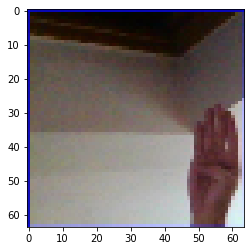

In [8]:
import matplotlib.pyplot as plt
from skimage.io import imread
import numpy as np
import cv2

import os
import pandas as pd

filename_list = []

for files in os.listdir(TEST_PATH):
    filename = files.split('.')[0]
    filename = int(filename)
    filename_list.append(filename)
    
files_sorted_test = sorted(filename_list)

x_test = []

for i in range(len(files_sorted_test)):
    filename = files_sorted[i]
    
    image = imread(TEST_PATH + str(filename) + '.jpg')
    smallimage = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))
    
    x_test.append(smallimage)
    
X_test = np.array(x_test)

plt.imshow(X_test[0]);

## Tratamiento de imágenes

In [9]:
print("Min:", np.min(X_train))
print("Max:", np.max(X_train))

Min: 0
Max: 255


In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

print("Min:", np.min(X_train))
print("Max:", np.max(X_train))

Min: 0.0
Max: 1.0


In [11]:
X_train.shape

(9000, 64, 64, 3)

In [12]:
type(X_train[0])

numpy.ndarray

In [13]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, Y_train, random_state = 42)

In [14]:
print(X_train.shape)
print(y_train.shape)
print(type(X_train[0]))
print(type(y_train[0]))

(9000, 64, 64, 3)
(9000,)
<class 'numpy.ndarray'>
<class 'numpy.int64'>


## Comenzamos a montar el modelo

In [15]:
from tensorflow import keras

layers = [
    #Convolucionales
    keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (IMAGE_SIZE[0], IMAGE_SIZE[1], IMAGE_SIZE[2])),
    keras.layers.MaxPooling2D(pool_size = (2,2)),
    keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size = (2,2)),
    
    #Flatten
    keras.layers.Flatten(),
    
    #Full layer
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(29, activation = 'sigmoid')
]

model = keras.Sequential(layers)

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

2021-09-17 11:47:48.437599: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-17 11:47:48.437617: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-09-17 11:47:49.121392: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-17 11:47:49.121719: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-17 11:47:49.121750: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.s

In [26]:
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(patience=5)

In [17]:
model.fit(X_train, y_train, epochs = 50, batch_size = 128, callbacks = [earlystop], validation_split = 0.2)

2021-09-17 11:47:54.207171: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
57/57 [==============================] - 4s 66ms/step - loss: 3.2739 - accuracy: 0.0718 - val_loss: 2.9692 - val_accuracy: 0.1961
Epoch 2/50
57/57 [==============================] - 4s 67ms/step - loss: 2.5494 - accuracy: 0.2788 - val_loss: 2.2324 - val_accuracy: 0.3400
Epoch 3/50
57/57 [==============================] - 4s 67ms/step - loss: 1.8438 - accuracy: 0.4565 - val_loss: 1.7714 - val_accuracy: 0.4550
Epoch 4/50
57/57 [==============================] - 4s 68ms/step - loss: 1.4536 - accuracy: 0.5656 - val_loss: 1.4007 - val_accuracy: 0.5822
Epoch 5/50
57/57 [==============================] - 4s 68ms/step - loss: 1.1747 - accuracy: 0.6478 - val_loss: 1.1690 - val_accuracy: 0.6494
Epoch 6/50
57/57 [==============================] - 4s 68ms/step - loss: 0.9609 - accuracy: 0.7160 - val_loss: 1.0434 - val_accuracy: 0.6867
Epoch 7/50
57/57 [==============================] - 4s 68ms/step - loss: 0.7989 - accuracy: 0.7683 - val_loss: 0.9006 - val_accuracy: 0.7439
Epoch 8/50
57

In [20]:
predictions = model.predict(X_test)
pred_labels = np.argmax(predictions, axis = 1)

In [21]:
pred_labels

array([ 1,  1, 21, ...,  0, 26, 17])

In [27]:
# function to return key for any value
def get_key(val):
    for key, value in dict1.items():
         if val == value:
             return key
    return "key doesn't exist"

predictions_list = []

for i in pred_labels:
    predictions_list.append(get_key(i))

print(predictions_list)

['B', 'B', 'V', 'B', 'C', 'A', 'W', 'Q', 'A', 'F', 'X', 'S', 'W', 'F', 'O', 'Z', 'D', 'I', 'B', 'E', 'D', 'nothing', 'N', 'E', 'A', 'L', 'W', 'A', 'P', 'A', 'F', 'P', 'R', 'F', 'Z', 'E', 'A', 'M', 'L', 'Y', 'space', 'L', 'Y', 'G', 'T', 'R', 'W', 'A', 'M', 'T', 'B', 'C', 'D', 'D', 'C', 'I', 'J', 'del', 'T', 'del', 'A', 'A', 'space', 'G', 'A', 'O', 'Z', 'S', 'G', 'B', 'U', 'G', 'nothing', 'E', 'D', 'E', 'G', 'A', 'S', 'P', 'W', 'G', 'M', 'D', 'L', 'I', 'G', 'V', 'T', 'A', 'S', 'G', 'P', 'Q', 'N', 'S', 'E', 'J', 'J', 'Y', 'P', 'U', 'I', 'M', 'R', 'del', 'M', 'O', 'V', 'L', 'M', 'A', 'A', 'L', 'E', 'P', 'B', 'nothing', 'I', 'K', 'B', 'R', 'K', 'J', 'F', 'B', 'G', 'U', 'A', 'D', 'del', 'A', 'X', 'F', 'S', 'B', 'L', 'A', 'L', 'B', 'O', 'L', 'G', 'del', 'X', 'G', 'K', 'C', 'B', 'L', 'G', 'M', 'N', 'Y', 'A', 'Y', 'G', 'G', 'N', 'B', 'R', 'I', 'W', 'U', 'B', 'I', 'U', 'A', 'H', 'E', 'L', 'B', 'M', 'Q', 'A', 'G', 'I', 'S', 'F', 'del', 'M', 'G', 'D', 'space', 'nothing', 'F', 'R', 'G', 'K', 'B', '

In [35]:
file_sort_str = []

for i in files_sorted_test:
    file_sort_str.append(str(i) + '.jpg')

In [36]:
submision_df = pd.DataFrame({
    'archivo': file_sort_str,
    'target': predictions_list
})

In [41]:
submision_df.set_index('archivo')

,target
archivo,
0.jpg,B
1.jpg,B
2.jpg,V
3.jpg,B
4.jpg,C
...,...
1145.jpg,N
1146.jpg,S
1147.jpg,A


In [37]:
submision_df.head()

,archivo,target
0,0.jpg,B
1,1.jpg,B
2,2.jpg,V
3,3.jpg,B
4,4.jpg,C


In [44]:
submision_df.to_csv('submision_sample_1.csv', sep = ',', index = False)

## Montamos segundo modelo

In [50]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], IMAGE_SIZE[2])))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(152, activation = 'relu'))
model.add(Dense(52, activation = 'relu'))
model.add(Dense(29, activation = 'sigmoid'))

model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [51]:
model.fit(X_train, Y_train, epochs = 50, callbacks = [earlystop], validation_split = 0.2)

Epoch 1/50
225/225 [==============================] - 1s 2ms/step - loss: 3.3859 - accuracy: 0.0388 - val_loss: 3.3676 - val_accuracy: 0.0333
Epoch 2/50
225/225 [==============================] - 0s 2ms/step - loss: 3.3676 - accuracy: 0.0317 - val_loss: 3.3680 - val_accuracy: 0.0344
Epoch 3/50
225/225 [==============================] - 0s 2ms/step - loss: 3.3675 - accuracy: 0.0339 - val_loss: 3.3684 - val_accuracy: 0.0344
Epoch 4/50
225/225 [==============================] - 0s 2ms/step - loss: 3.3674 - accuracy: 0.0358 - val_loss: 3.3686 - val_accuracy: 0.0294
Epoch 5/50
225/225 [==============================] - 0s 2ms/step - loss: 3.3674 - accuracy: 0.0361 - val_loss: 3.3688 - val_accuracy: 0.0294
Epoch 6/50
225/225 [==============================] - 0s 2ms/step - loss: 3.3674 - accuracy: 0.0354 - val_loss: 3.3690 - val_accuracy: 0.0294
Epoch 7/50
225/225 [==============================] - 0s 2ms/step - loss: 3.3673 - accuracy: 0.0367 - val_loss: 3.3692 - val_accuracy: 0.0294
Epoch 

## Montamos el tercer modelo

In [27]:
from tensorflow import keras

layers = [
    #Convolucionales
    keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (IMAGE_SIZE[0], IMAGE_SIZE[1], IMAGE_SIZE[2])),
    keras.layers.MaxPooling2D(pool_size = (2,2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size = (2,2)),
    keras.layers.Dropout(0.2),
    
    #Flatten
    keras.layers.Flatten(),
    
    #Full layer
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(48, activation = 'relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(29, activation = 'softmax')
]

model = keras.Sequential(layers)

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [28]:
model.fit(X_train, y_train, epochs = 30, batch_size = 152, callbacks = [earlystop], validation_split = 0.2)

Epoch 1/30
48/48 [==============================] - 22s 450ms/step - loss: 3.3767 - accuracy: 0.0399 - val_loss: 3.3443 - val_accuracy: 0.0539
Epoch 2/30
48/48 [==============================] - 21s 433ms/step - loss: 3.2193 - accuracy: 0.0869 - val_loss: 2.9128 - val_accuracy: 0.2067
Epoch 3/30
48/48 [==============================] - 22s 452ms/step - loss: 2.7342 - accuracy: 0.2071 - val_loss: 2.3736 - val_accuracy: 0.3089
Epoch 4/30
48/48 [==============================] - 22s 454ms/step - loss: 2.2856 - accuracy: 0.3057 - val_loss: 1.9763 - val_accuracy: 0.4217
Epoch 5/30
48/48 [==============================] - 22s 453ms/step - loss: 1.9507 - accuracy: 0.3947 - val_loss: 1.6912 - val_accuracy: 0.5044
Epoch 6/30
48/48 [==============================] - 22s 453ms/step - loss: 1.7084 - accuracy: 0.4610 - val_loss: 1.4096 - val_accuracy: 0.5850
Epoch 7/30
48/48 [==============================] - 22s 454ms/step - loss: 1.4930 - accuracy: 0.5153 - val_loss: 1.2869 - val_accuracy: 0.6228

In [29]:
predictions_2 = model.predict(X_test)
pred_labels_2 = np.argmax(predictions_2, axis = 1)

In [30]:
# function to return key for any value
def get_key(val):
    for key, value in dict1.items():
         if val == value:
             return key
    return "key doesn't exist"

predictions_list_2 = []

for i in pred_labels_2:
    predictions_list_2.append(get_key(i))

print(predictions_list_2)

['B', 'V', 'V', 'B', 'O', 'M', 'W', 'Q', 'E', 'F', 'X', 'S', 'W', 'F', 'del', 'Z', 'F', 'I', 'D', 'del', 'E', 'nothing', 'N', 'E', 'B', 'L', 'V', 'N', 'Q', 'C', 'F', 'P', 'R', 'F', 'Z', 'E', 'A', 'M', 'L', 'Y', 'X', 'L', 'Y', 'H', 'T', 'R', 'B', 'B', 'L', 'T', 'B', 'C', 'D', 'V', 'C', 'I', 'space', 'del', 'Z', 'del', 'M', 'C', 'space', 'H', 'N', 'Z', 'Z', 'S', 'P', 'E', 'V', 'G', 'nothing', 'E', 'R', 'del', 'H', 'A', 'S', 'P', 'V', 'J', 'N', 'L', 'T', 'I', 'G', 'V', 'T', 'C', 'S', 'G', 'P', 'Q', 'N', 'S', 'N', 'J', 'J', 'T', 'P', 'U', 'I', 'J', 'R', 'del', 'M', 'O', 'V', 'L', 'M', 'A', 'L', 'L', 'F', 'P', 'I', 'nothing', 'I', 'K', 'I', 'R', 'K', 'J', 'F', 'B', 'G', 'U', 'A', 'Z', 'del', 'C', 'X', 'L', 'Z', 'E', 'L', 'C', 'Z', 'K', 'O', 'L', 'G', 'del', 'Z', 'P', 'K', 'C', 'F', 'O', 'P', 'Z', 'N', 'Y', 'C', 'Y', 'G', 'H', 'N', 'B', 'R', 'I', 'U', 'U', 'B', 'K', 'V', 'A', 'G', 'O', 'L', 'B', 'M', 'Q', 'F', 'H', 'I', 'S', 'P', 'del', 'N', 'H', 'D', 'space', 'nothing', 'P', 'U', 'space', '

In [31]:
file_sort_str_2 = []

for i in files_sorted_test:
    file_sort_str_2.append(str(i) + '.jpg')

In [32]:
submision_df_2 = pd.DataFrame({
    'archivo': file_sort_str_2,
    'target': predictions_list_2
})

In [33]:
submision_df_2.set_index('archivo')

,target
archivo,
0.jpg,B
1.jpg,V
2.jpg,V
3.jpg,B
4.jpg,O
...,...
1145.jpg,N
1146.jpg,Z
1147.jpg,A


In [34]:
submision_df_2.to_csv('submision_sample_8.csv', sep = ',', index = False)

## Pretrained network ()

In [46]:
import pandas as pd

df = pd.read_csv(ROOT_PATH + 'file_target.csv')
df.head()

,archivo,target
0,0.jpg,G
1,1.jpg,H
2,2.jpg,G
3,3.jpg,X
4,4.jpg,H


In [47]:
df['target_2'] = y
df.head()

,archivo,target,target_2
0,0.jpg,G,6
1,1.jpg,H,7
2,2.jpg,G,6
3,3.jpg,X,23
4,4.jpg,H,7


In [48]:
from sklearn.model_selection import train_test_split

train_df, validate_df = train_test_split(df,
                                         test_size=0.20,
                                         random_state=42)

In [51]:
from keras.preprocessing.image import ImageDataGenerator


# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
validation_datagen = ImageDataGenerator(rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_dataframe(train_df,
                                                    TRAIN_PATH,
                                                    x_col='archivo',
                                                    y_col='target',
                                                    batch_size = 20,
                                                    class_mode = 'sparse',
                                                    target_size = (IMAGE_SIZE[0], IMAGE_SIZE[1]))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = validation_datagen.flow_from_dataframe(validate_df,
                                                              TRAIN_PATH,
                                                              x_col='archivo',
                                                              y_col='target',
                                                              batch_size = 20,
                                                              class_mode = 'sparse',
                                                              target_size = (IMAGE_SIZE[0], IMAGE_SIZE[1]))

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers

base_model = VGG16(input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3),
                  include_top = False,
                  weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False
    
##### FULLY CONNECTED LAYER #####
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(29, activation='softmax')(x)

model = keras.models.Model(base_model.input, x)
    
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

Found 7200 validated image filenames belonging to 29 classes.
Found 1800 validated image filenames belonging to 29 classes.


In [52]:
vgghist = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 30)

Epoch 1/30
360/360 [==============================] - 68s 189ms/step - loss: 2.9656 - accuracy: 0.1692 - val_loss: 2.3491 - val_accuracy: 0.2967
Epoch 2/30
360/360 [==============================] - 74s 206ms/step - loss: 2.4041 - accuracy: 0.3022 - val_loss: 1.9591 - val_accuracy: 0.4422
Epoch 3/30
360/360 [==============================] - 70s 196ms/step - loss: 2.2066 - accuracy: 0.3396 - val_loss: 1.8826 - val_accuracy: 0.4456
Epoch 4/30
360/360 [==============================] - 71s 196ms/step - loss: 2.0395 - accuracy: 0.3811 - val_loss: 1.7019 - val_accuracy: 0.4828
Epoch 5/30
360/360 [==============================] - 71s 197ms/step - loss: 1.9689 - accuracy: 0.4032 - val_loss: 1.5974 - val_accuracy: 0.5089
Epoch 6/30
360/360 [==============================] - 71s 197ms/step - loss: 1.8916 - accuracy: 0.4226 - val_loss: 1.5610 - val_accuracy: 0.5417
Epoch 7/30
360/360 [==============================] - 71s 197ms/step - loss: 1.8365 - accuracy: 0.4340 - val_loss: 1.4587 - val_ac